In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('drougth_data.csv')

In [3]:
new=df.drop(columns=['DATE'])

In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRCP     25523 non-null  float64
 1   TMAX     25526 non-null  float64
 2   TMIN     25526 non-null  float64
 3   drougth  25523 non-null  object 
dtypes: float64(3), object(1)
memory usage: 798.6+ KB


In [5]:
new.isnull().sum()

PRCP       28
TMAX       25
TMIN       25
drougth    28
dtype: int64

In [6]:
ne=new.dropna()

In [7]:
ne.isnull().sum()

PRCP       0
TMAX       0
TMIN       0
drougth    0
dtype: int64

In [8]:
# Convert boolean values to 1 and 0
ne['drougth'] = ne['drougth'].astype(int)
ne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25523 entries, 0 to 25525
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRCP     25523 non-null  float64
 1   TMAX     25523 non-null  float64
 2   TMIN     25523 non-null  float64
 3   drougth  25523 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 997.0 KB


C:\Users\bhanu\AppData\Local\Temp\ipykernel_29668\3754435431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ne['drougth'] = ne['drougth'].astype(int)


In [10]:
ne.head(15)

PRCP  TMAX  TMIN  drougth
0   0.47  51.0  42.0        1
1   0.59  45.0  36.0        1
2   0.42  45.0  35.0        1
3   0.31  45.0  34.0        1
4   0.17  45.0  32.0        1
5   0.44  48.0  39.0        1
6   0.41  50.0  40.0        1
7   0.04  48.0  35.0        1
8   0.12  50.0  31.0        1
9   0.74  43.0  34.0        1
10  0.01  42.0  32.0        1
11  0.00  41.0  26.0        0
12  0.00  45.0  29.0        0
13  0.00  38.0  26.0        0
14  0.00  34.0  31.0        0

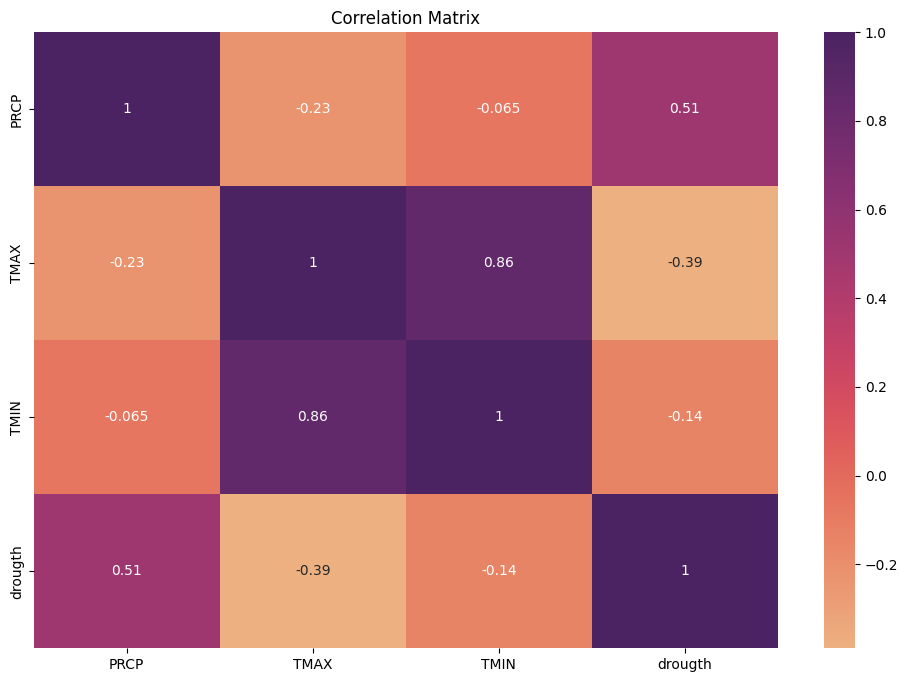

In [9]:
# Correlation matrix
corr_matrix = ne.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation calculation

# Visualize correlation using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.title('Correlation Matrix')
plt.show()

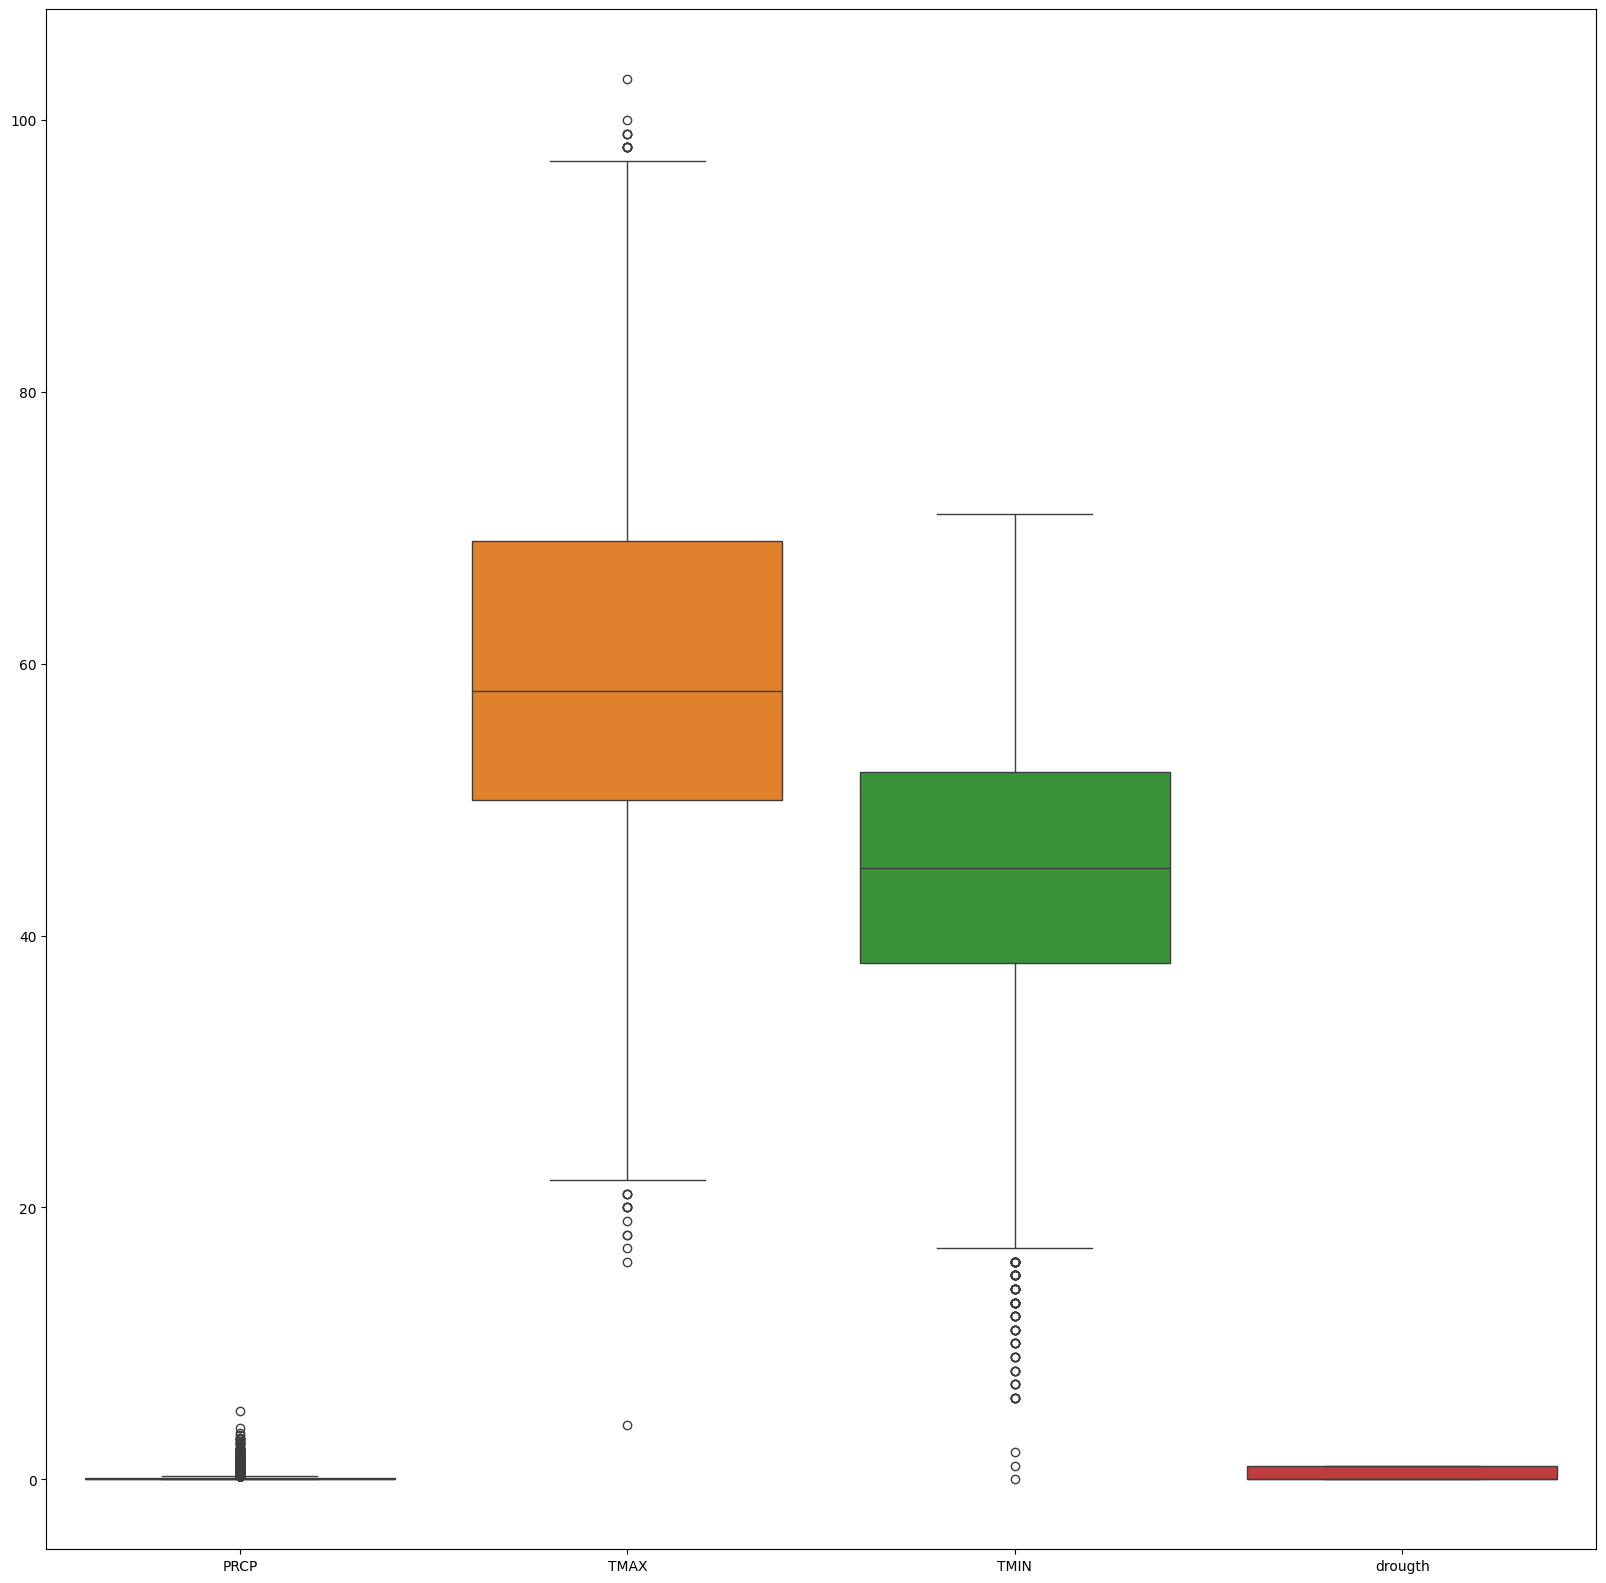

In [10]:
plt.figure(figsize=(20,20))
ax=sns.boxplot(data=ne)

In [11]:
 #Here we'll read and remove outlier's in the dataset using zscore matrix
from scipy import stats
z=np.abs(stats.zscore(ne))
print(z)

           PRCP      TMAX      TMIN   drougth
0      1.522890  0.669480  0.283304  1.159371
1      2.025121  1.139163  0.957996  1.159371
2      1.313627  1.139163  1.070444  1.159371
3      0.853249  1.139163  1.182893  1.159371
4      0.267313  1.139163  1.407790  1.159371
...         ...       ...       ...       ...
25521  1.481038  0.512919  0.170856  1.159371
25522  0.225461  1.217444  0.283304  1.159371
25523  0.444180  0.747761  0.283304  0.862537
25524  0.444180  0.591200  0.395753  0.862537
25525  1.983269  0.512919  0.620650  1.159371

[25523 rows x 4 columns]


In [12]:
threshold=3
# here we'll print z whose greater than third deviation
print(np.where(z > 3))

(array([   46,    55,    80,   147,   148,   162,   269,   271,   318,
         343,   358,   368,   374,   375,   376,   388,   389,   390,
         393,   406,   412,   417,   665,   681,   695,   718,   722,
         726,   732,   733,   734,   736,   743,   743,   743,   744,
         744,   745,   745,   746,   747,   748,   749,   750,   754,
         755,   756,   758,   759,   760,   761,   761,   762,   763,
         764,   784,   792,   793,   805,   806,   807,   957,   997,
        1007,  1013,  1054,  1057,  1064,  1094,  1097,  1116,  1123,
        1124,  1125,  1134,  1135,  1152,  1367,  1383,  1419,  1460,
        1461,  1463,  1490,  1793,  1828,  1837,  1844,  1848,  1909,
        2099,  2108,  2151,  2165,  2179,  2196,  2211,  2212,  2234,
        2258,  2372,  2512,  2513,  2520,  2537,  2594,  2619,  2620,
        2837,  2838,  2853,  2854,  2862,  2871,  2872,  2872,  2873,
        2874,  2875,  2878,  2886,  2901,  2910,  2911,  2912,  2923,
        2924,  2925

In [13]:
Q1=ne.quantile(0.25)
Q3=ne.quantile(0.75)
IQR=Q3 - Q1
print(IQR)

PRCP        0.1
TMAX       19.0
TMIN       14.0
drougth     1.0
dtype: float64


In [14]:
ne = ne[(z < 3).all(axis=1)]
ne.shape #set the lower bound

(24843, 4)

In [15]:
ne=ne[~((ne < (Q1 - 1.5 * IQR)) | (ne > (Q3 + 1.5 * IQR))).any(axis=1)]
ne.shape #set the upper bound

(21858, 4)

In [16]:
#To check whether the outlier's are removed
plt.figure(figsize=(20,20))
ax= sns.boxplot(data=ne)

In [17]:
#feature Selection
plt.figure(figsize=(20,20))
d= sns.heatmap(ne.corr(),cmap="coolwarm",annot=True)
# red->+ve coorelation,blue->-ve coorelation ,skyblue->0 coorelation

In [18]:
x = ne.drop(columns = ['drougth'])
y = ne['drougth']

In [19]:
x

PRCP  TMAX  TMIN
4      0.17  45.0  32.0
7      0.04  48.0  35.0
8      0.12  50.0  31.0
10     0.01  42.0  32.0
11     0.00  41.0  26.0
...     ...   ...   ...
25517  0.05  52.0  43.0
25520  0.05  54.0  44.0
25522  0.16  44.0  42.0
25523  0.00  50.0  42.0
25524  0.00  52.0  41.0

[21858 rows x 3 columns]

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [22]:
#K - Nearest Neighbor classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train,y_train)
score = cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9325251601097896

In [23]:
# Random Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20 , criterion = 'entropy', random_state=51)
rf_classifier.fit(x_train,y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test,y_pred_rf)

1.0

In [24]:
#XG BOOST
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=23,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

1.0

In [25]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(max_iter=2000)
logistic_regressor.fit(x_train, y_train)
y_pred_lr = logistic_regressor.predict(x_test)
accuracy_score(y_test, y_pred_lr)

0.9123970722781336

In [30]:
# User input for prediction
perception = float(input("Enter Perception (in mm): "))
maxtemperature = float(input("Enter Max Temperature (in °F): "))
mintemperature = float(input("Enter Min Temperature (in °F): "))

# Assuming you have a trained KNN model named knn_clf
model = knn_classifier  # Assign the trained KNN model to the variable model

# Predicting Drougth Occurrence
predicted_drougth = model.predict(np.array([[perception, maxtemperature, mintemperature]]))
print(f"Predicted Drougth Occurrence: {'Drougth is Expected' if predicted_drougth[0] == 1 else 'No Drougth is expected'}")

Predicted Drougth Occurrence: No Drougth is expected


c:\Users\bhanu\.virtualenvs\Severe_Weather_Events-uk_o5pJ0\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
